In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [8]:
# Define the conditional diffusion model
class ConditionalDiffusionModel(nn.Module):
    def __init__(self, input_size, hidden_size, condition_size):
        super(ConditionalDiffusionModel, self).__init__()
        self.fc1 = nn.Linear(input_size + condition_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, input_size)

    def forward(self, x, c):
        x = torch.cat([x, c], dim=1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [9]:
# Define the negative log-likelihood loss function
def nll_loss(x, y):
    return torch.mean(torch.sum((x - y) ** 2, dim=1))

# Define the perceptual loss function
def perceptual_loss(x, y):
    return torch.mean(torch.abs(x - y))

In [11]:
# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

In [12]:
# Initialize the conditional diffusion model
conditional_model = ConditionalDiffusionModel(input_size=784, hidden_size=256, condition_size=10)

# Define the optimizer for the conditional model
conditional_optimizer = optim.Adam(conditional_model.parameters(), lr=0.001)

# Train the conditional diffusion model
for epoch in range(10):
    for i, (images, labels) in enumerate(train_loader):
        # Flatten the images
        images = images.view(images.size(0), -1)

        # One-hot encode the labels
        labels_onehot = torch.zeros(images.size(0), 10)
        labels_onehot.scatter_(1, labels.view(-1, 1), 1)

        # Forward pass
        outputs = conditional_model(images, labels_onehot)

        # Compute the loss
        loss = nll_loss(outputs, images)

        # Backward and optimize
        conditional_optimizer.zero_grad()
        loss.backward()
        conditional_optimizer.step()

        # Print the loss
        if (i+1) % 100 == 0:
            print('Conditional Model - Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, i+1, len(train_loader), loss.item()))

Conditional Model - Epoch [1/10], Step [100/938], Loss: 17.3024
Conditional Model - Epoch [1/10], Step [200/938], Loss: 9.4888
Conditional Model - Epoch [1/10], Step [300/938], Loss: 7.1702
Conditional Model - Epoch [1/10], Step [400/938], Loss: 6.1837
Conditional Model - Epoch [1/10], Step [500/938], Loss: 5.6719
Conditional Model - Epoch [1/10], Step [600/938], Loss: 4.7603
Conditional Model - Epoch [1/10], Step [700/938], Loss: 4.4015
Conditional Model - Epoch [1/10], Step [800/938], Loss: 4.2806
Conditional Model - Epoch [1/10], Step [900/938], Loss: 3.7606
Conditional Model - Epoch [2/10], Step [100/938], Loss: 3.7849
Conditional Model - Epoch [2/10], Step [200/938], Loss: 3.5236
Conditional Model - Epoch [2/10], Step [300/938], Loss: 3.0795
Conditional Model - Epoch [2/10], Step [400/938], Loss: 3.0879
Conditional Model - Epoch [2/10], Step [500/938], Loss: 3.2457
Conditional Model - Epoch [2/10], Step [600/938], Loss: 3.1796
Conditional Model - Epoch [2/10], Step [700/938], Loss

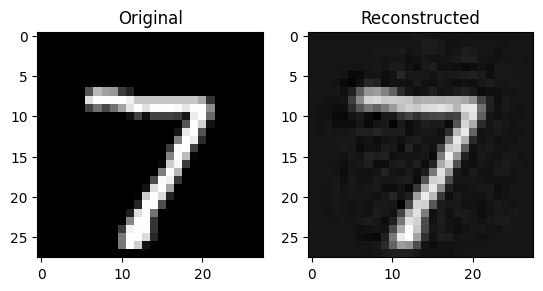

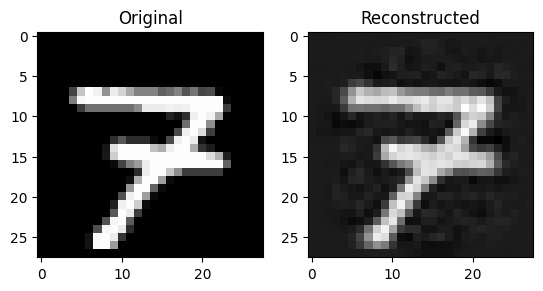

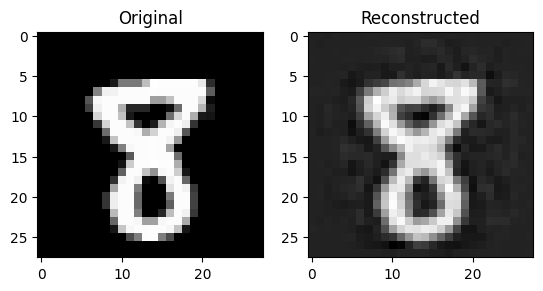

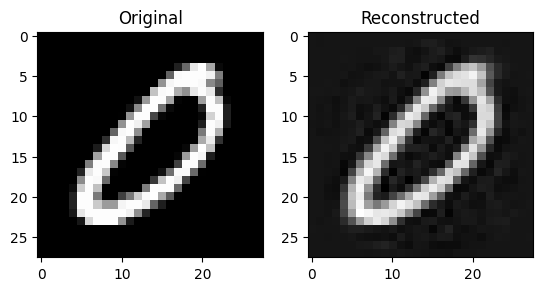

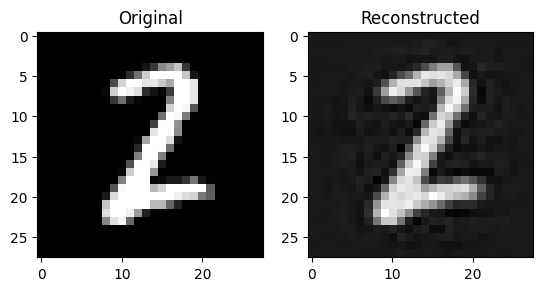

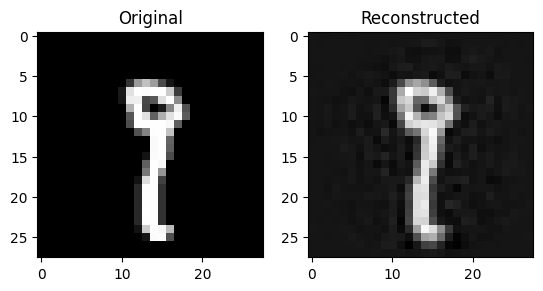

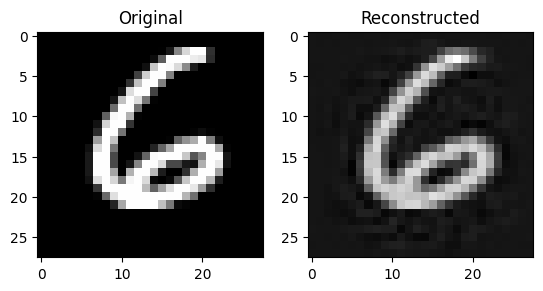

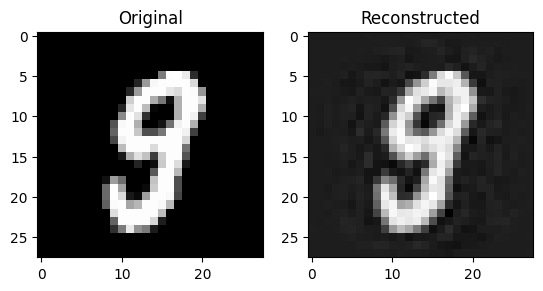

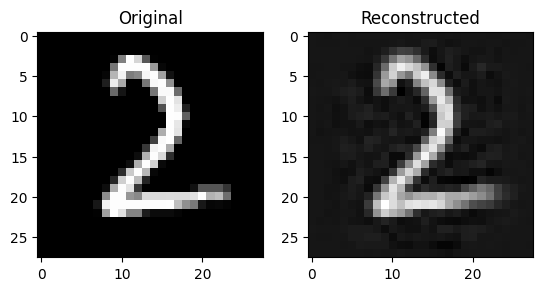

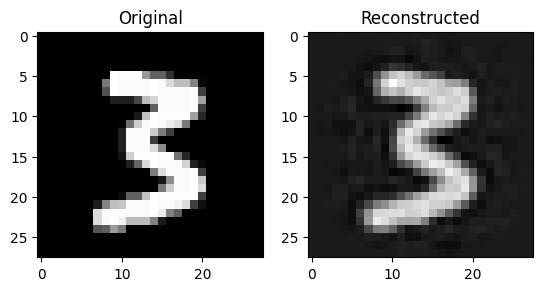

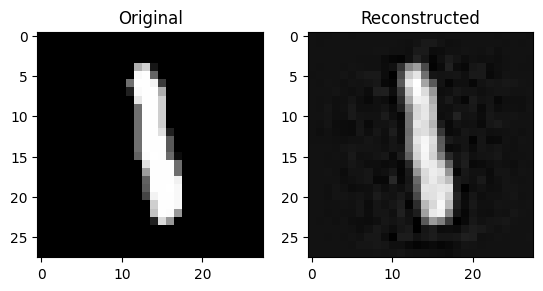

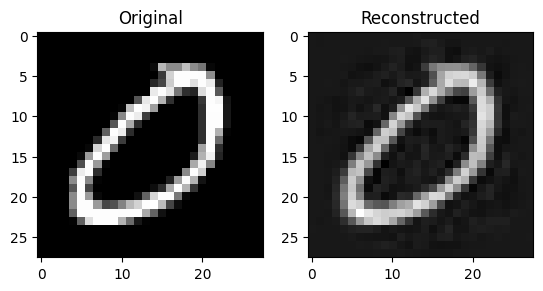

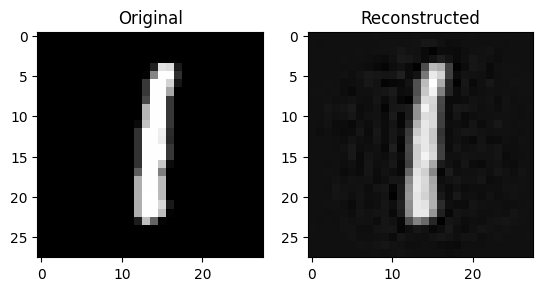

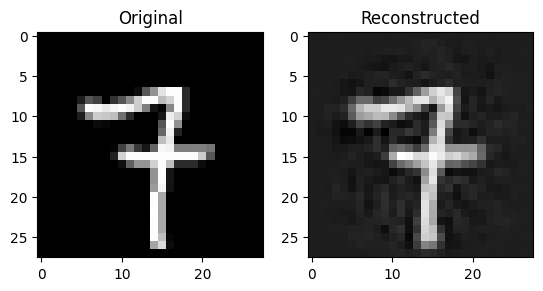

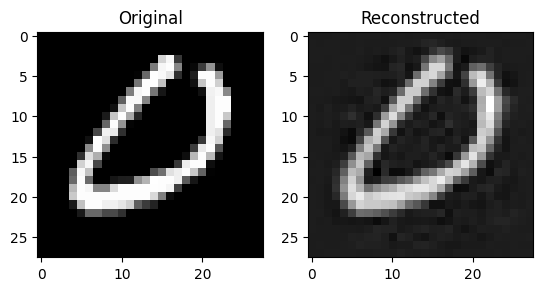

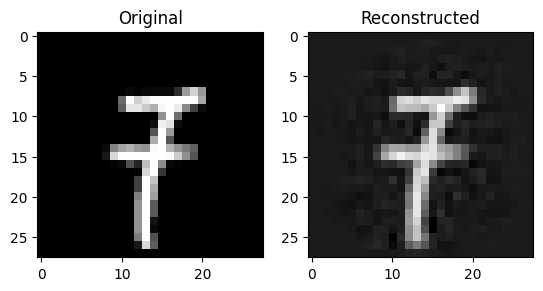

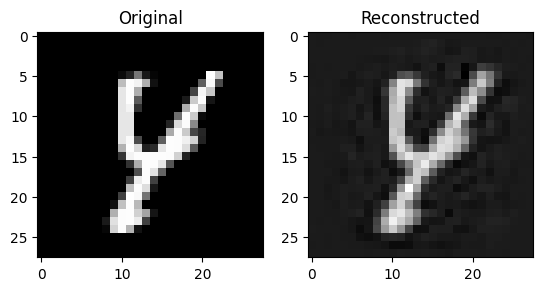

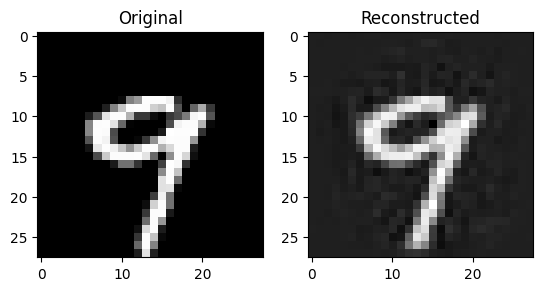

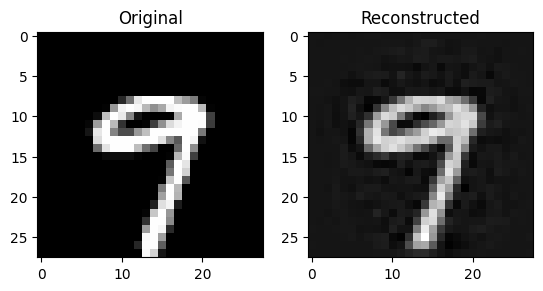

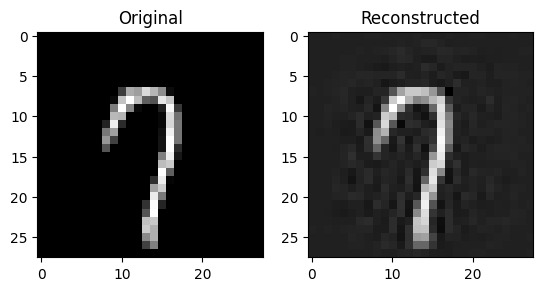

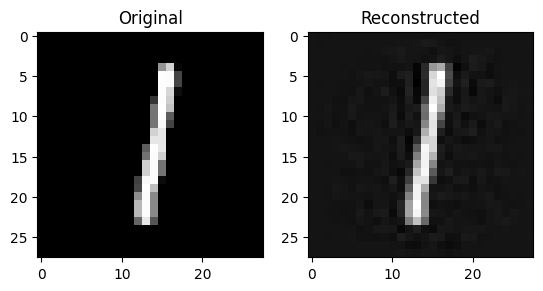

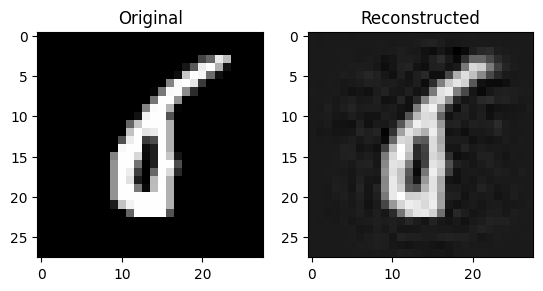

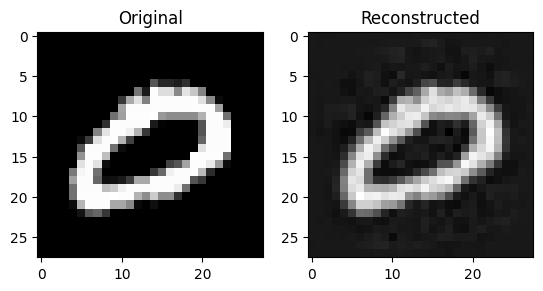

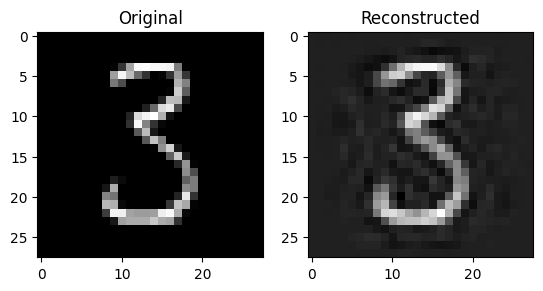

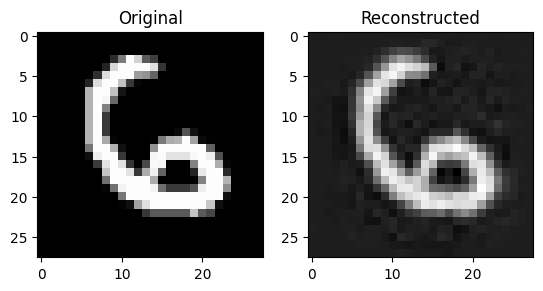

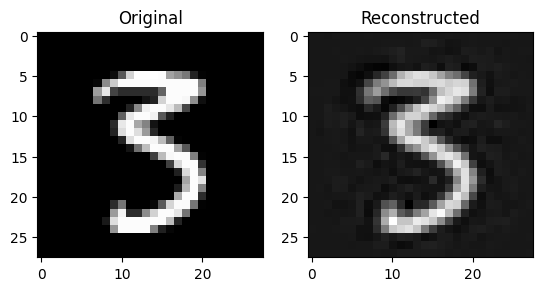

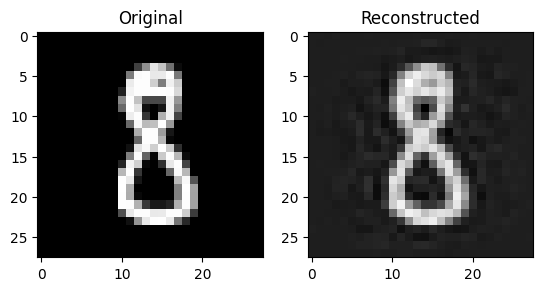

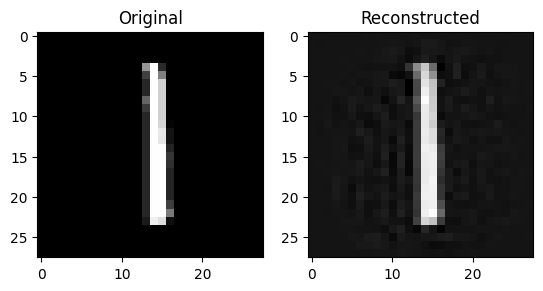

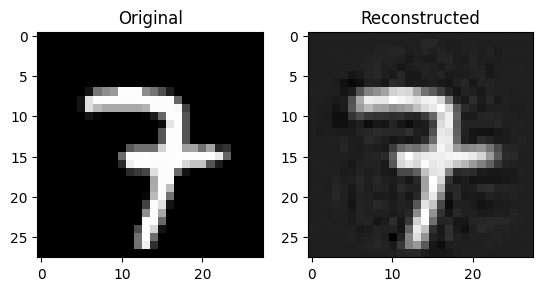

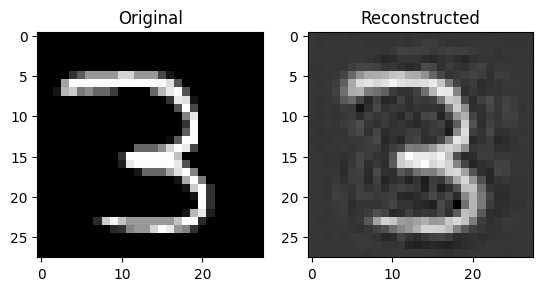

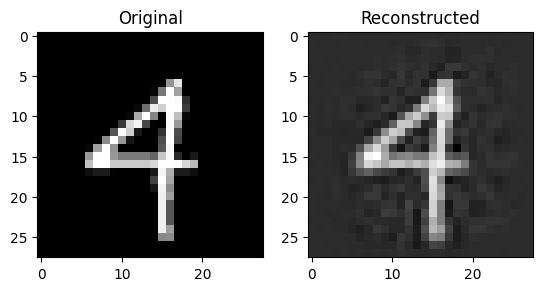

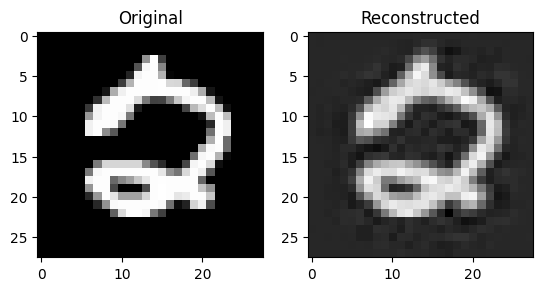

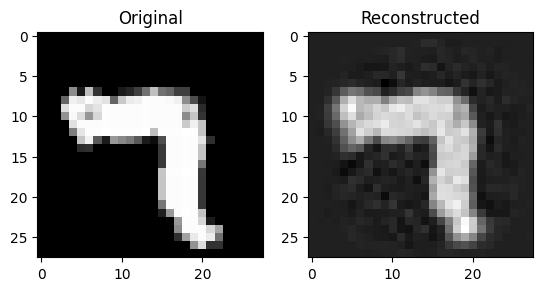

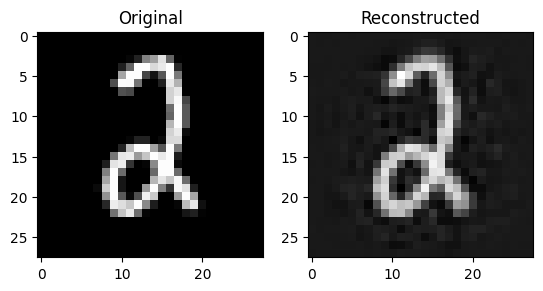

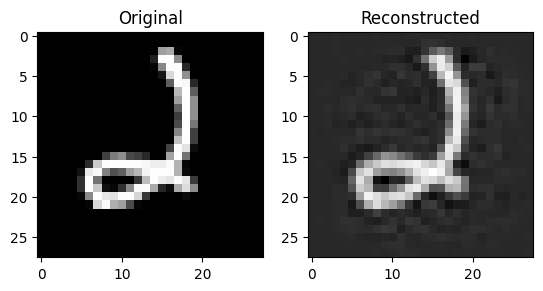

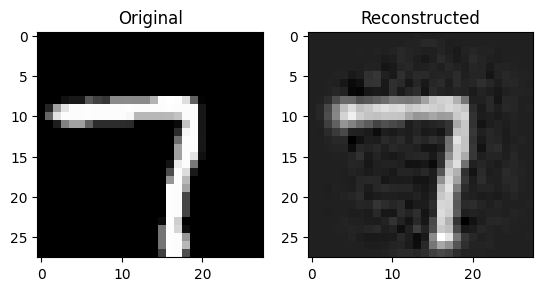

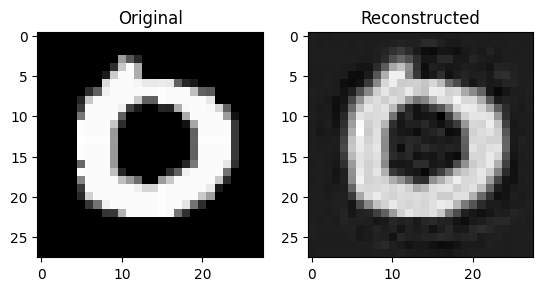

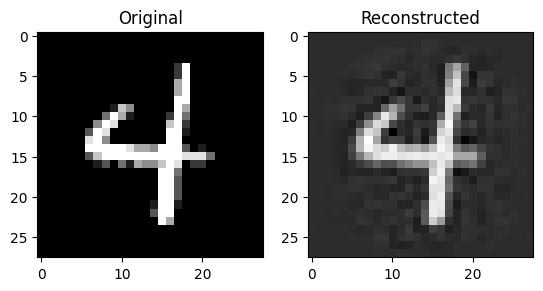

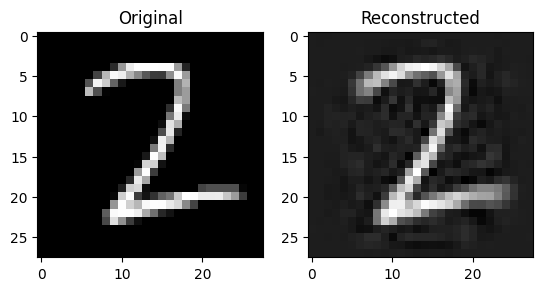

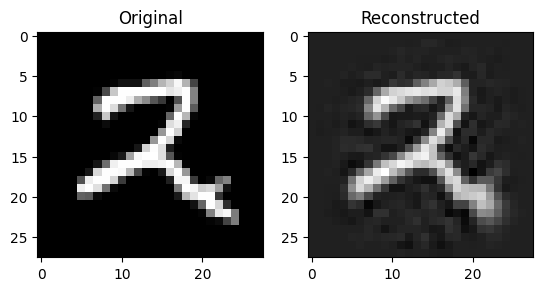

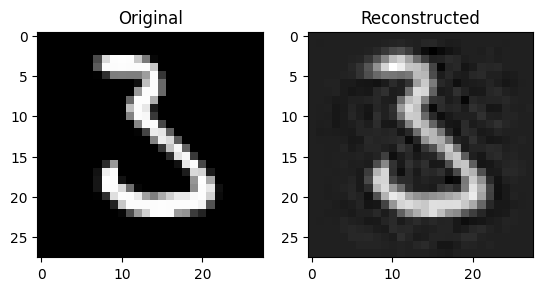

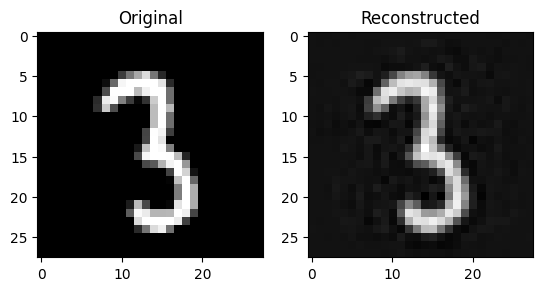

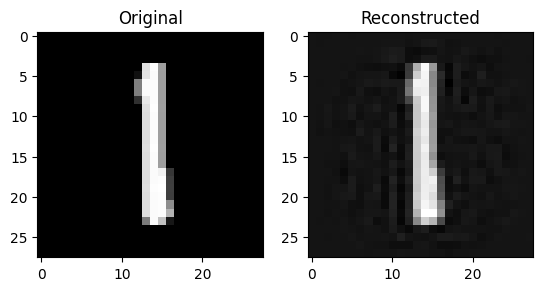

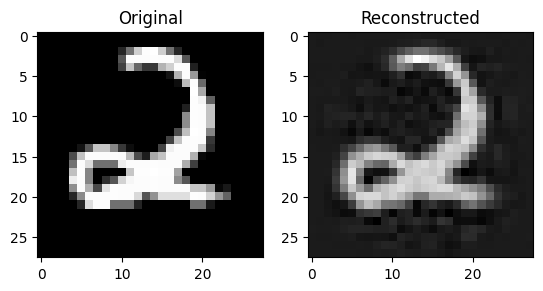

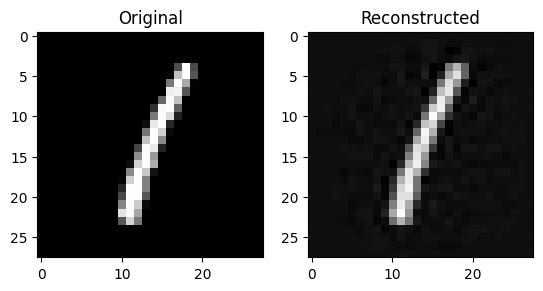

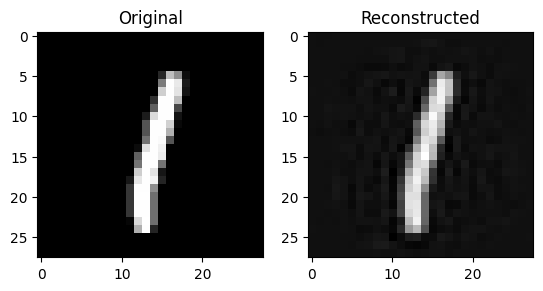

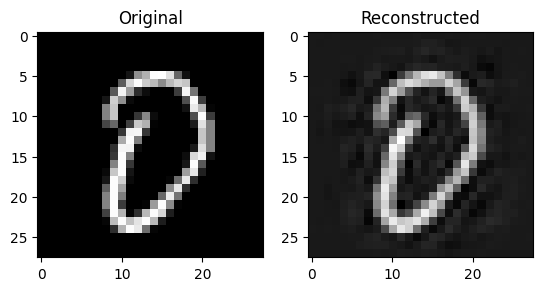

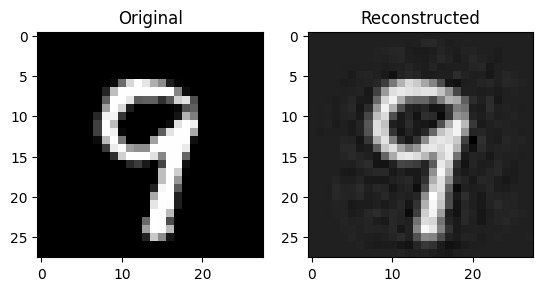

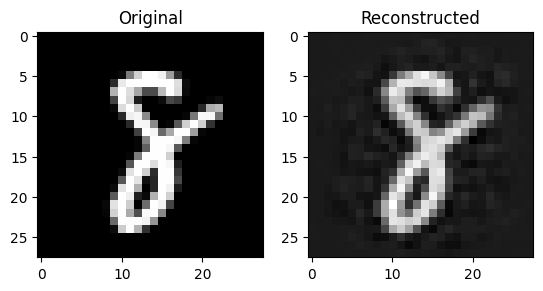

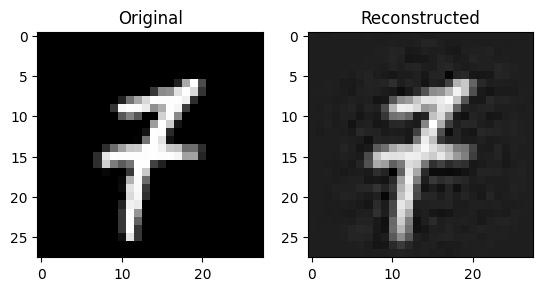

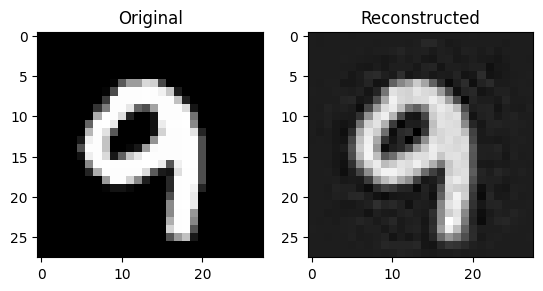

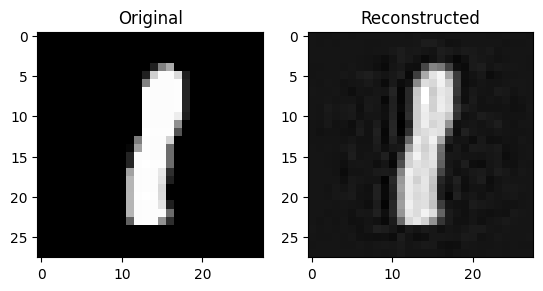

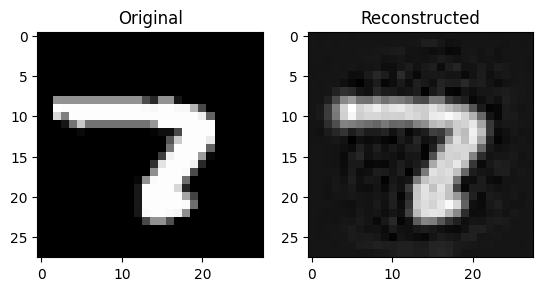

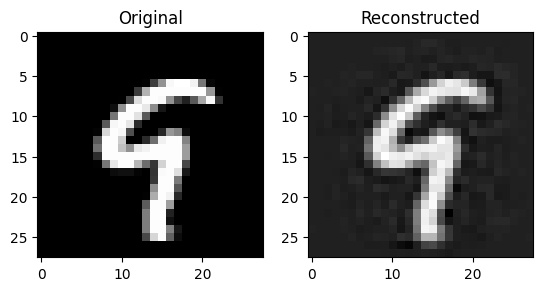

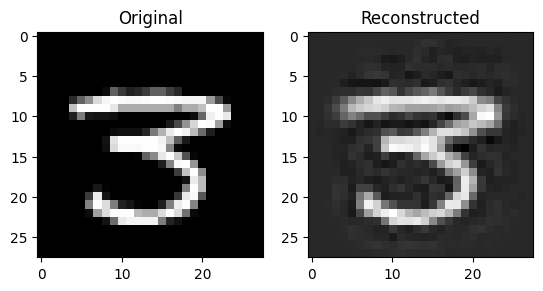

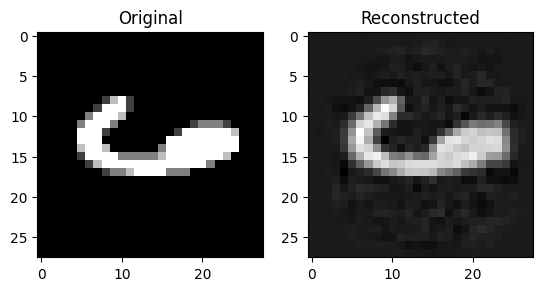

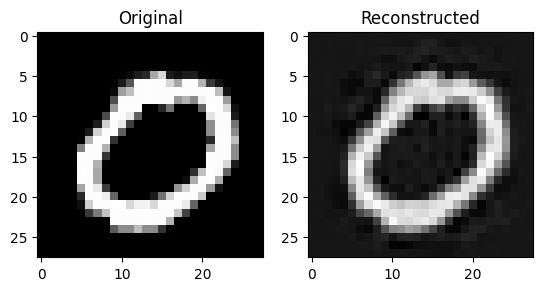

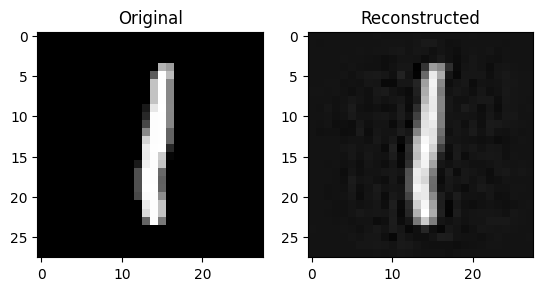

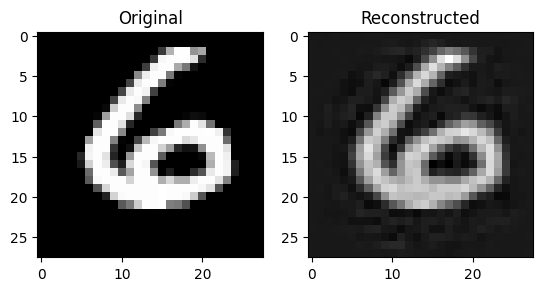

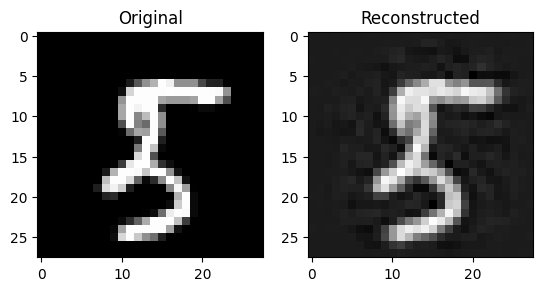

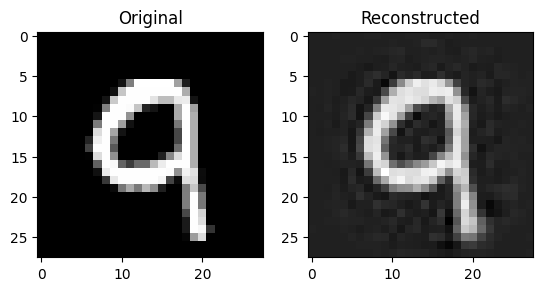

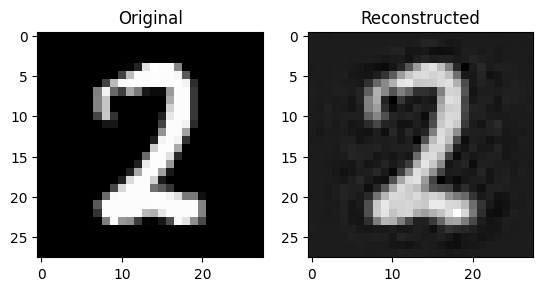

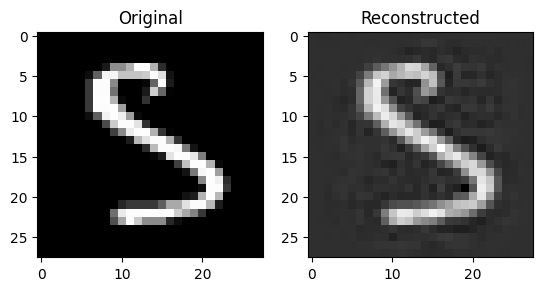

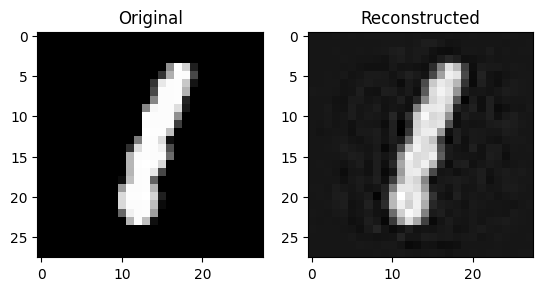

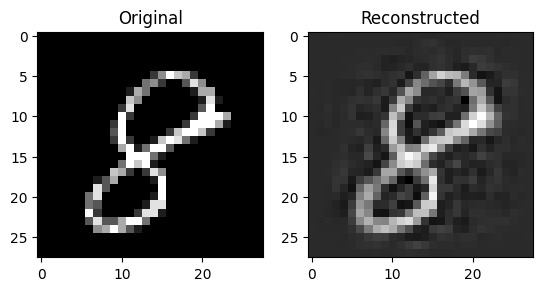

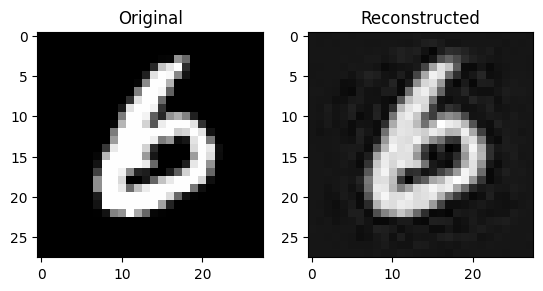

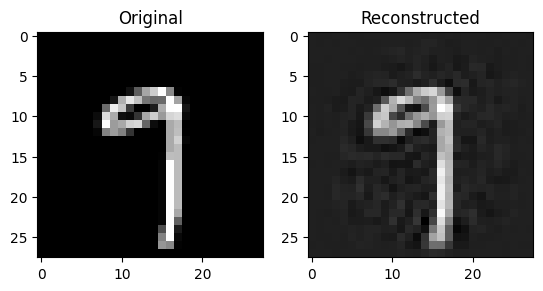

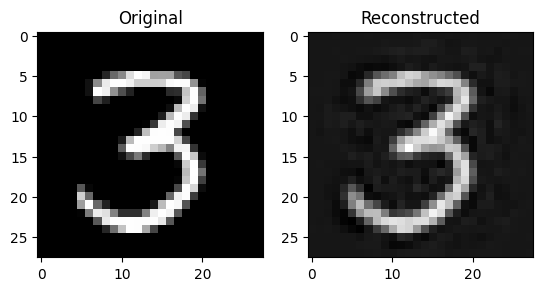

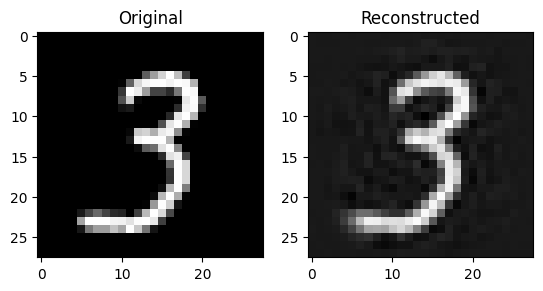

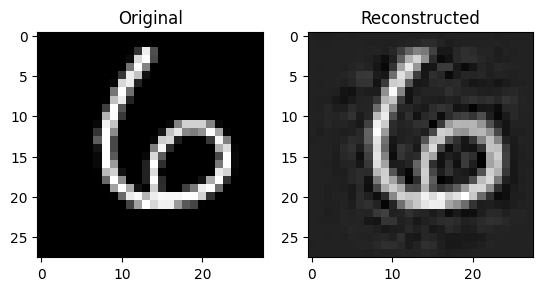

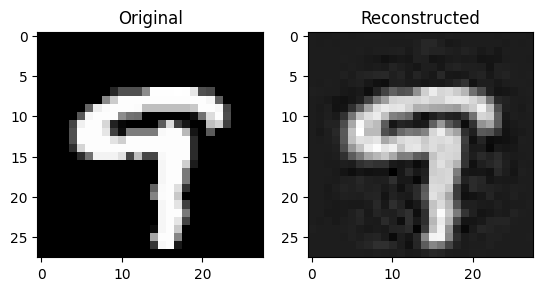

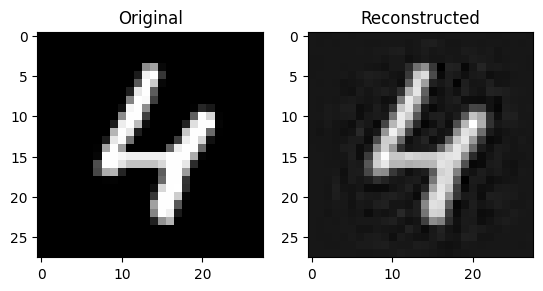

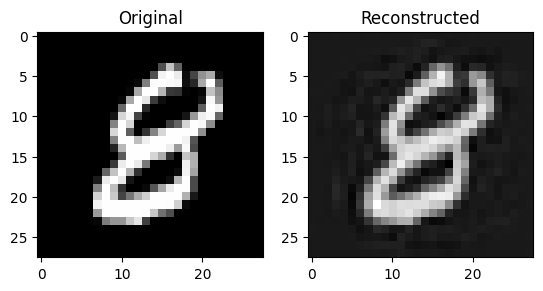

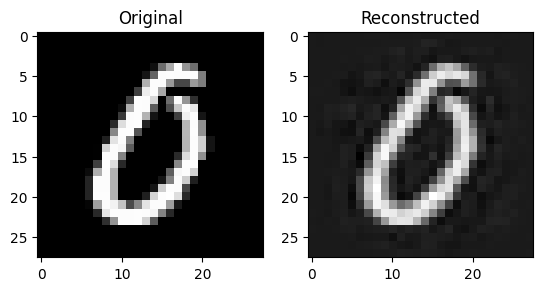

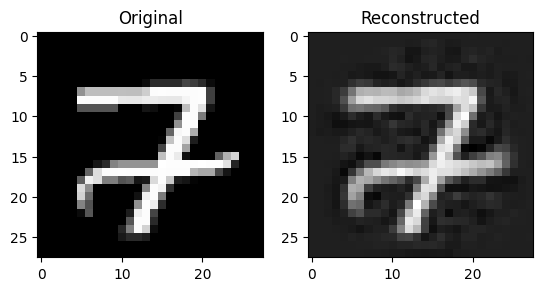

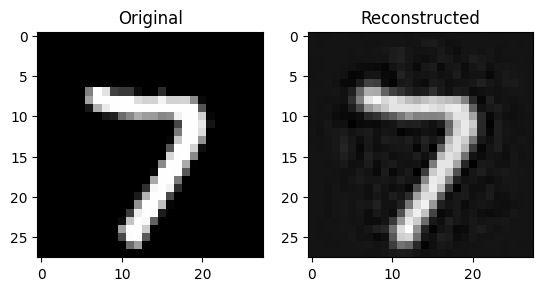

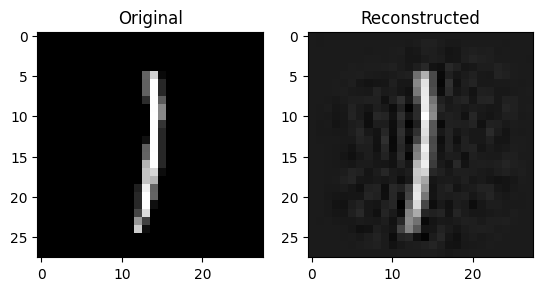

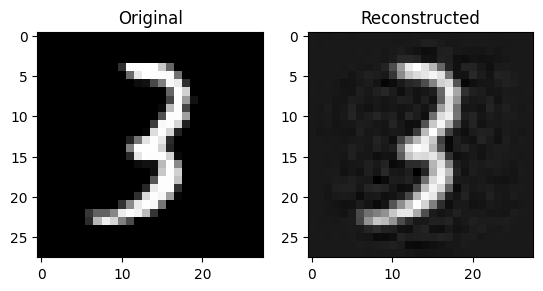

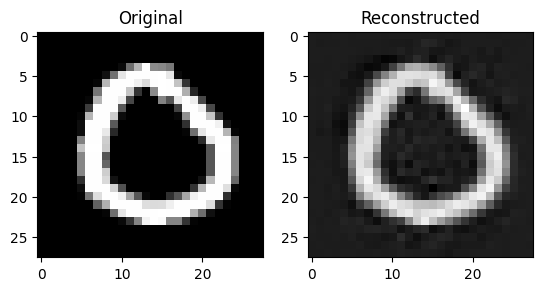

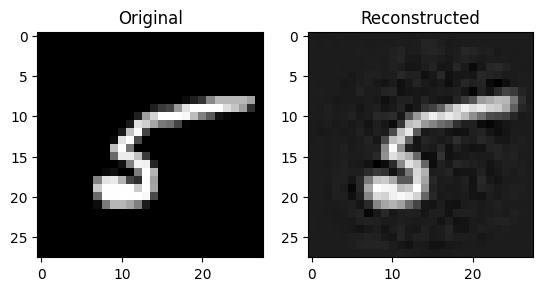

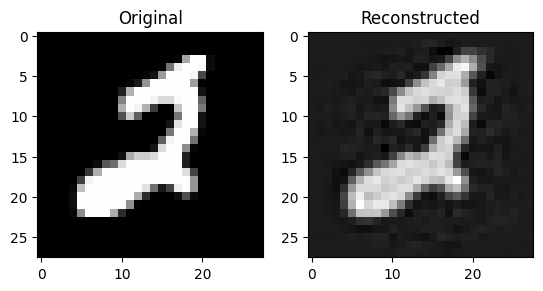

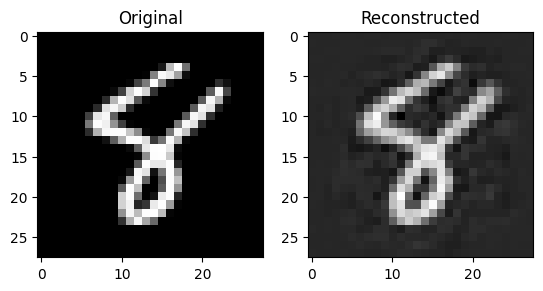

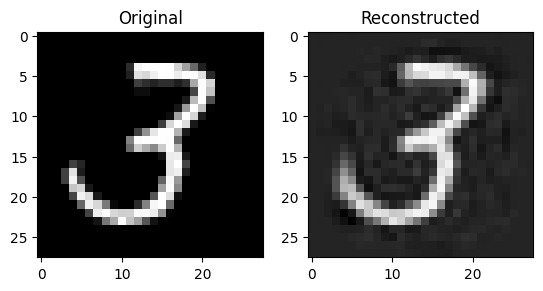

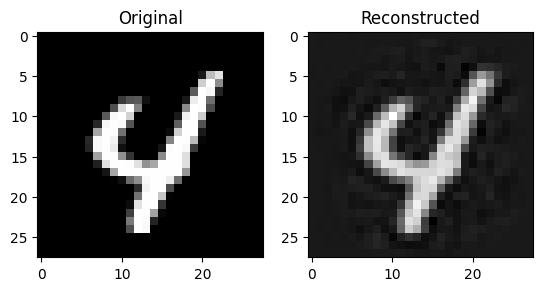

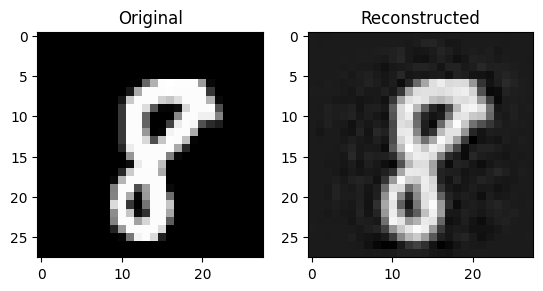

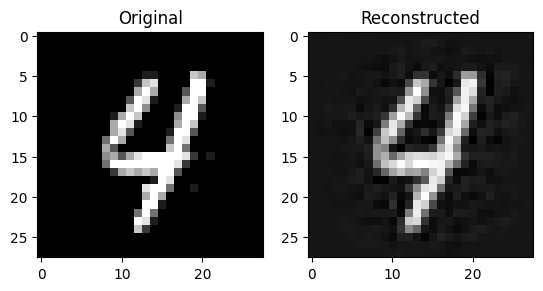

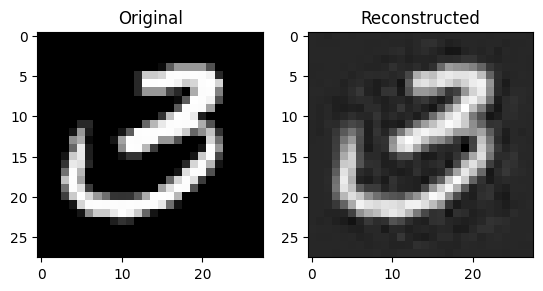

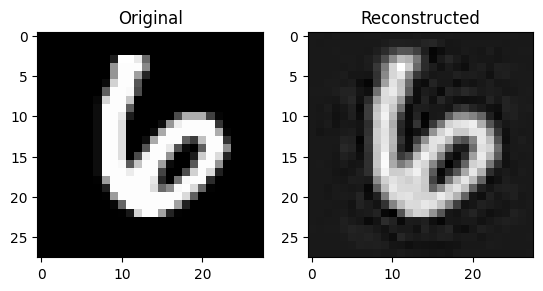

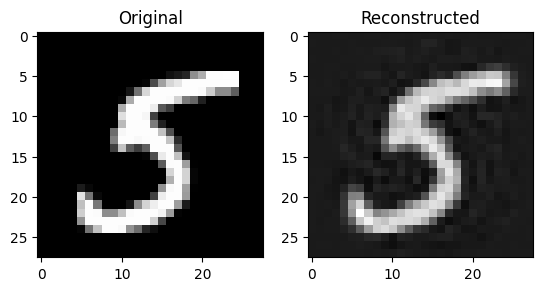

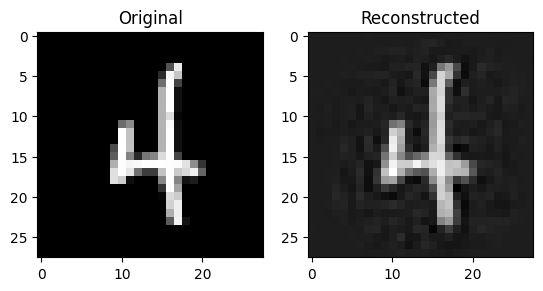

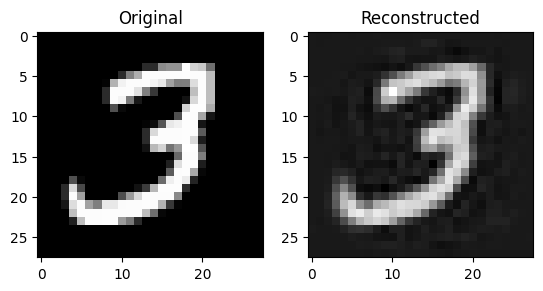

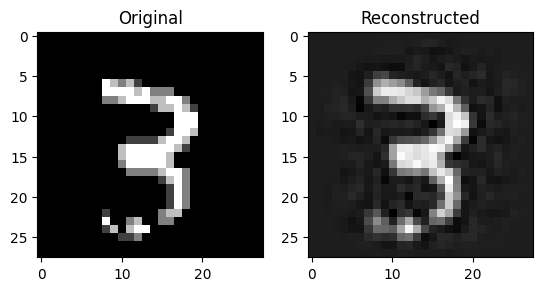

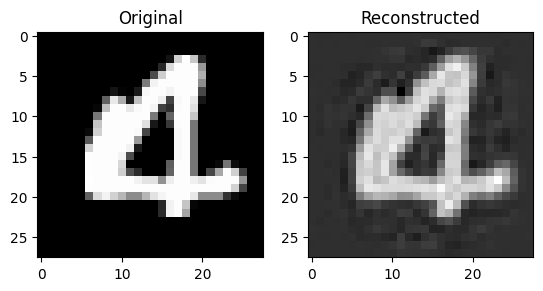

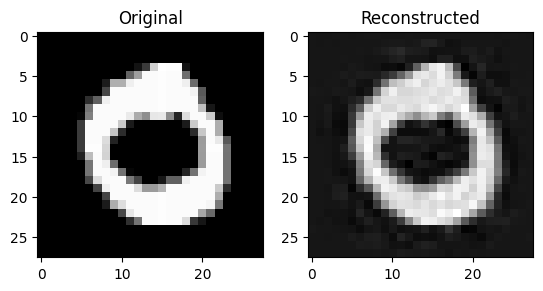

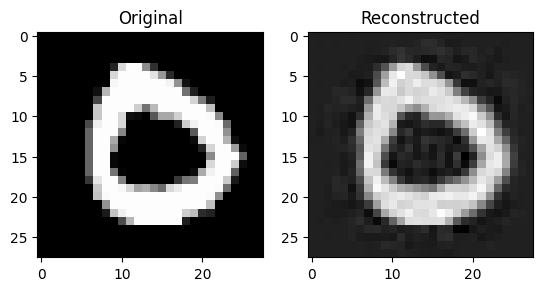

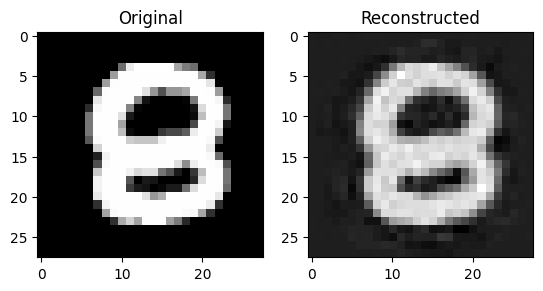

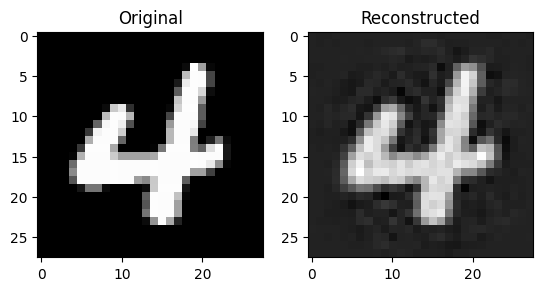

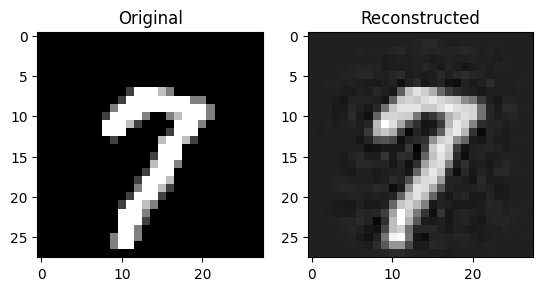

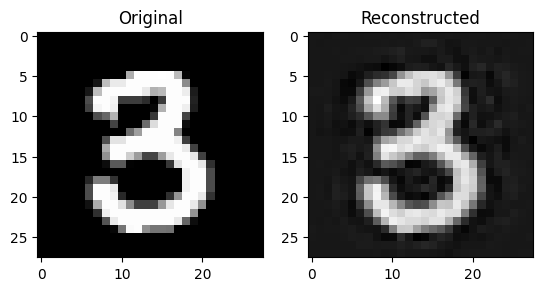

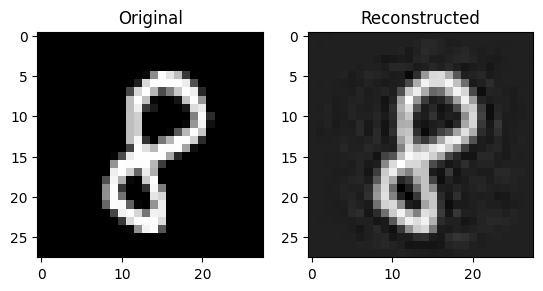

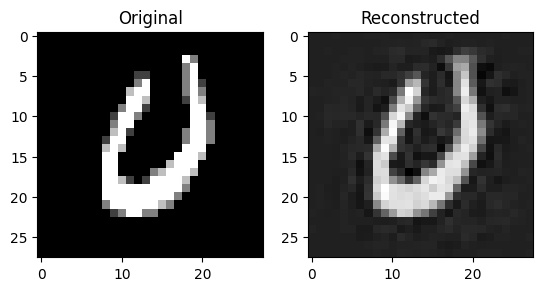

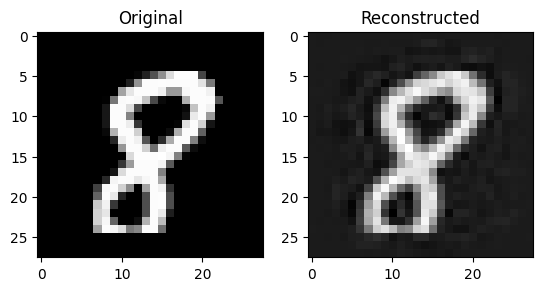

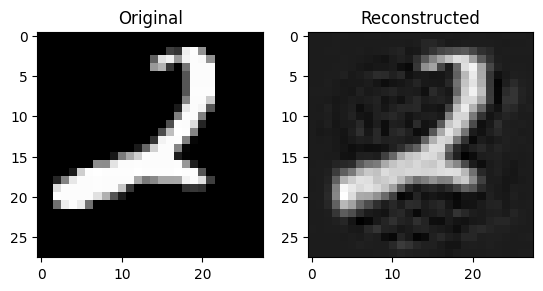

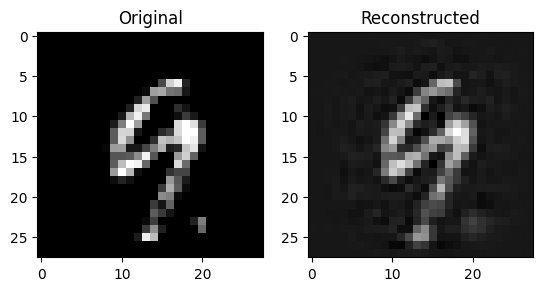

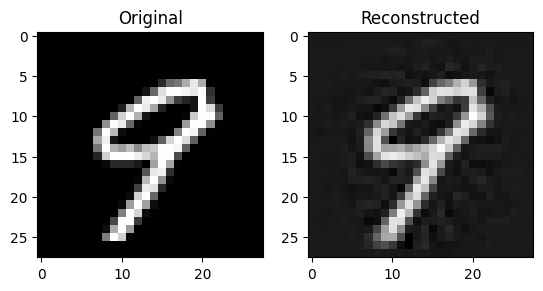

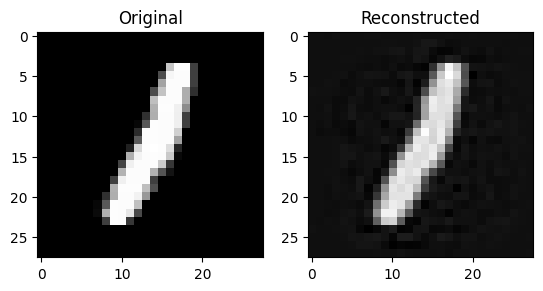

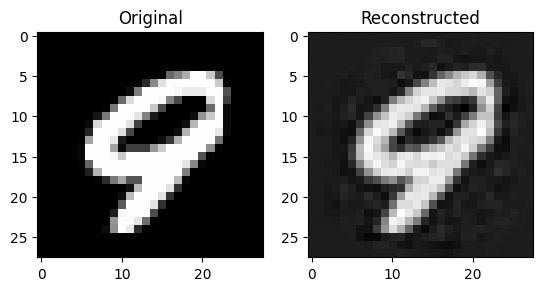

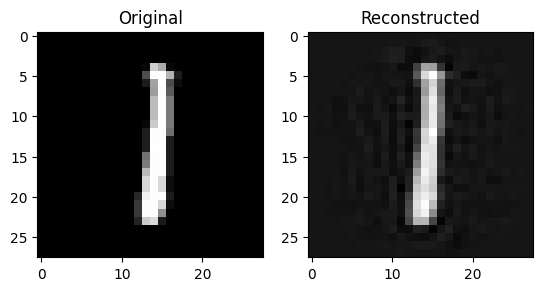

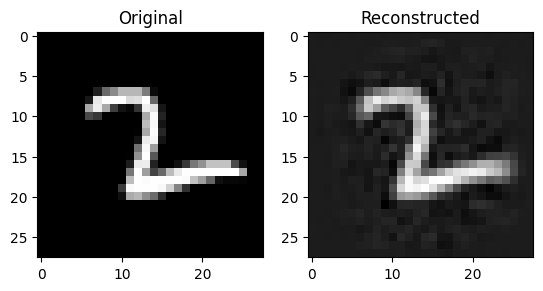

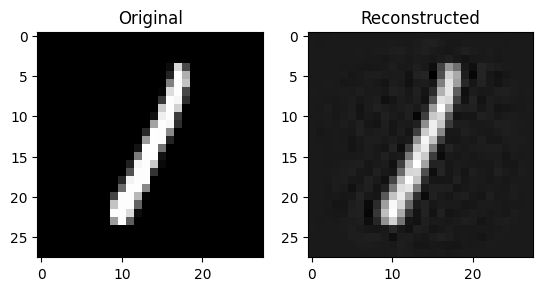

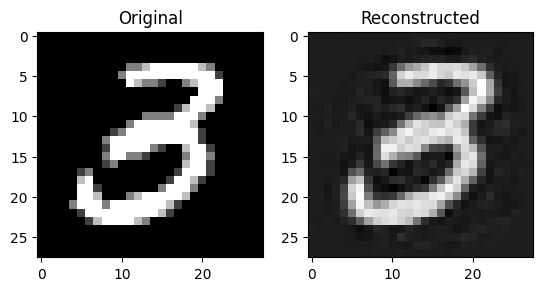

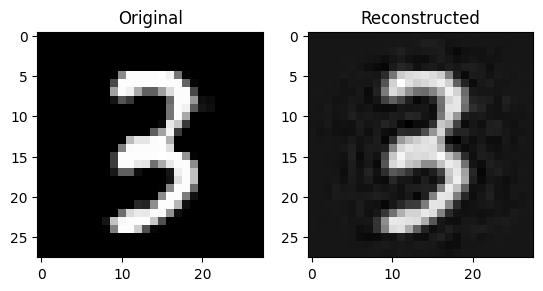

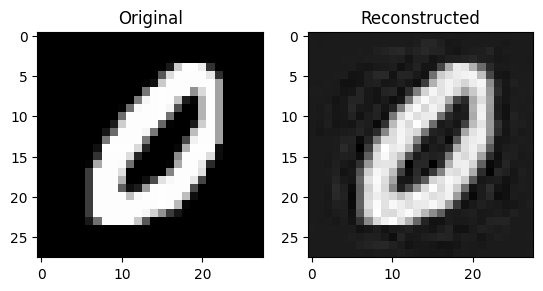

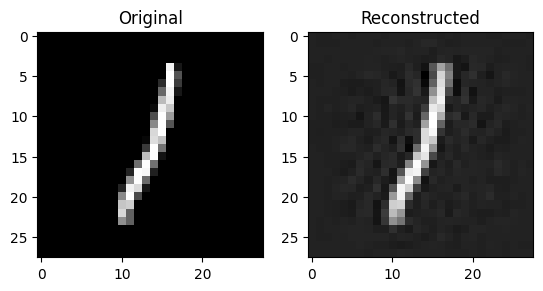

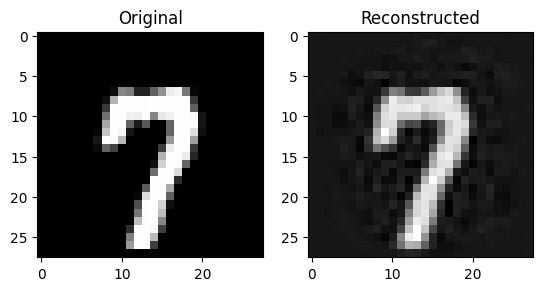

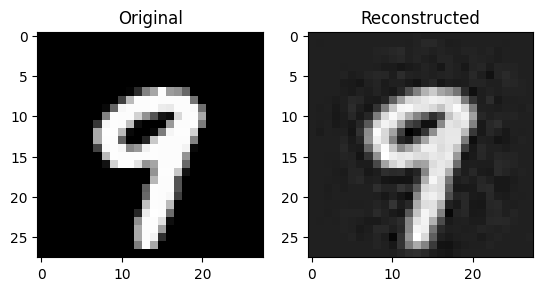

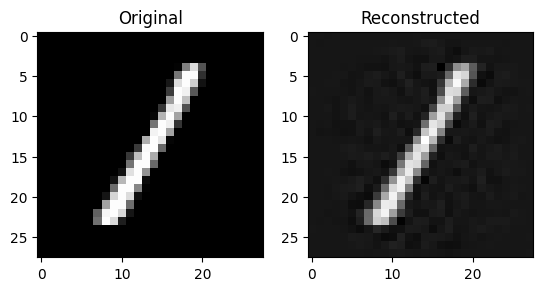

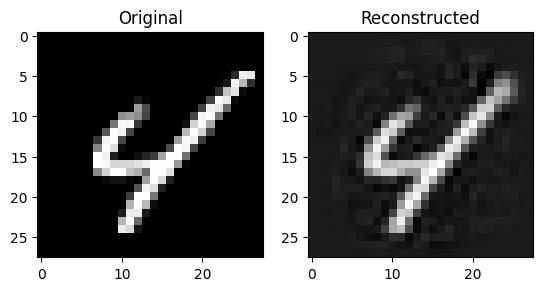

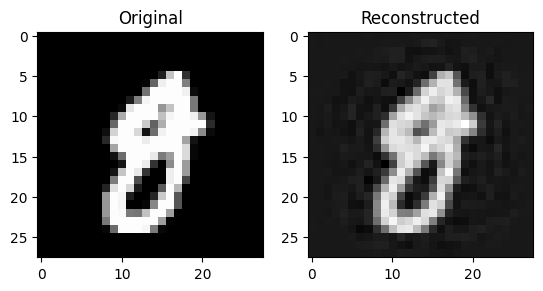

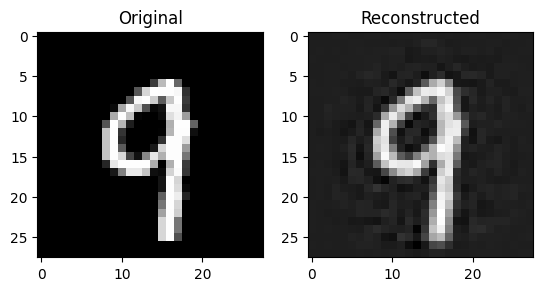

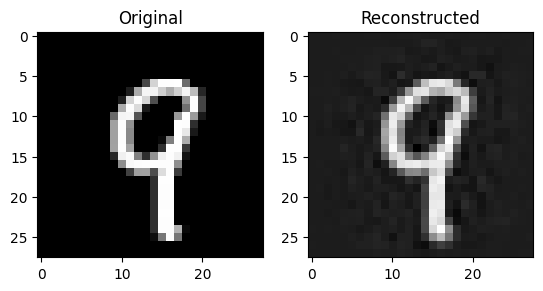

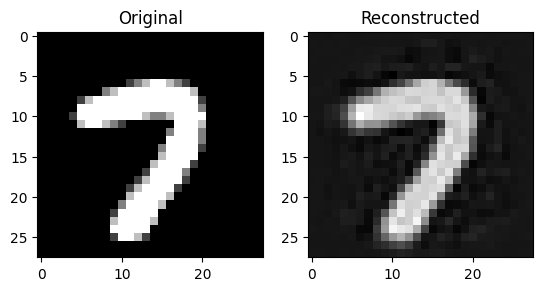

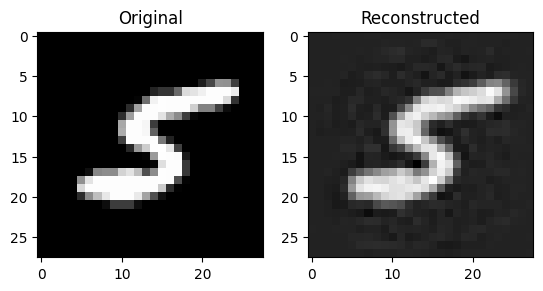

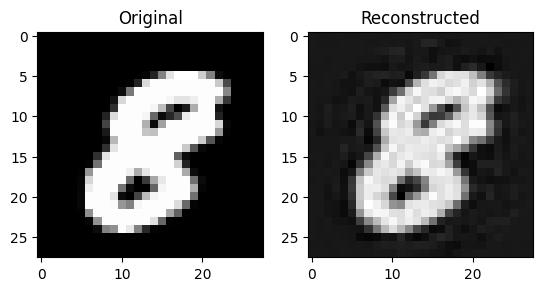

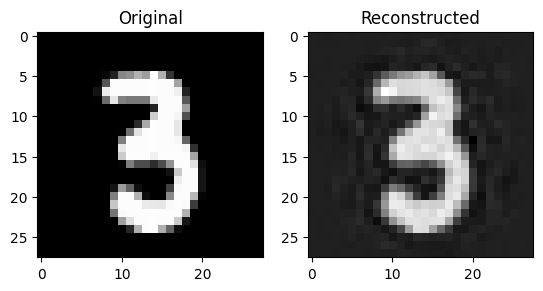

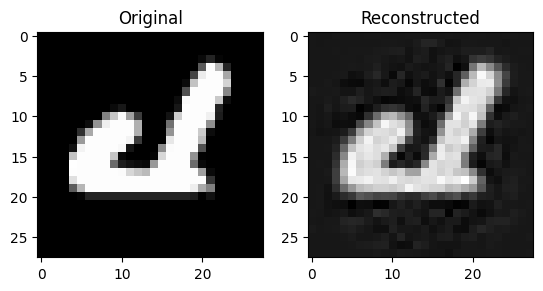

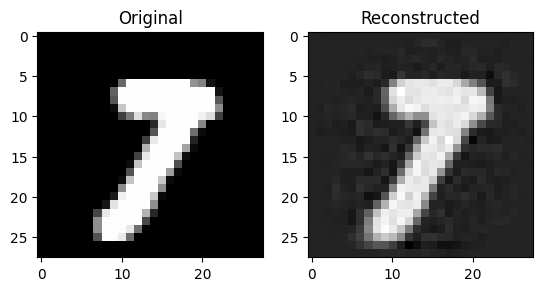

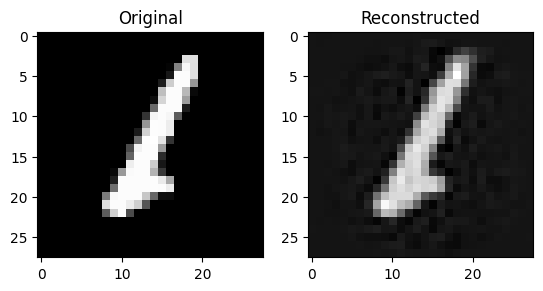

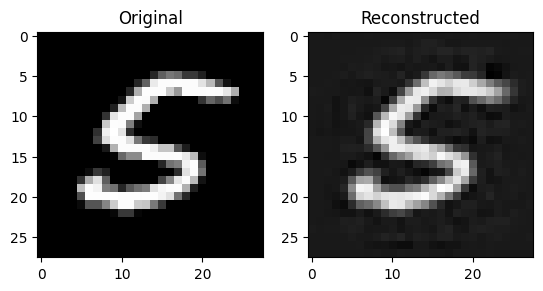

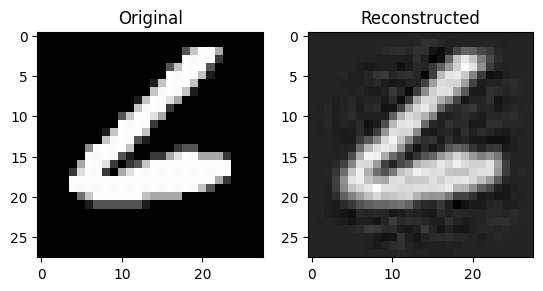

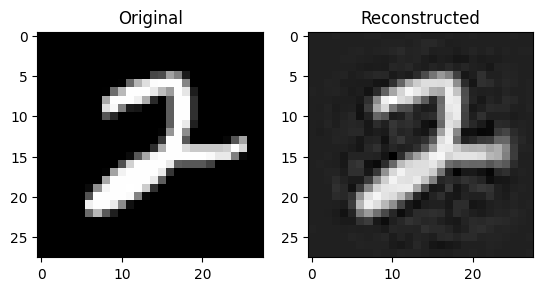

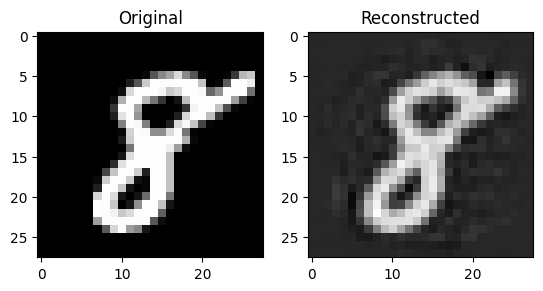

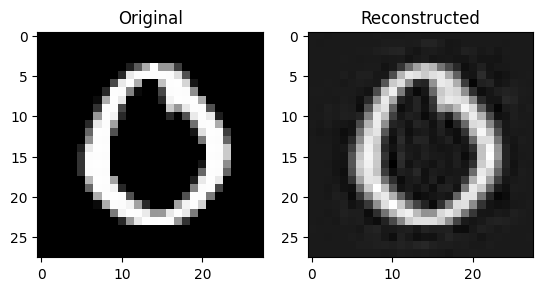

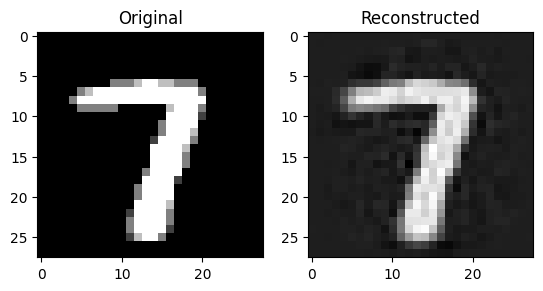

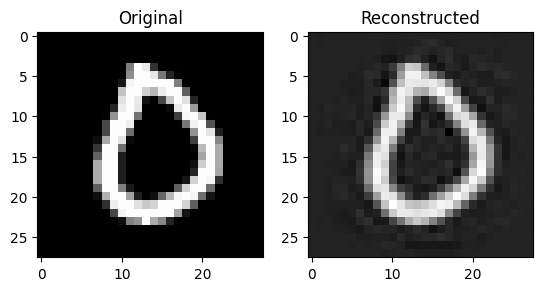

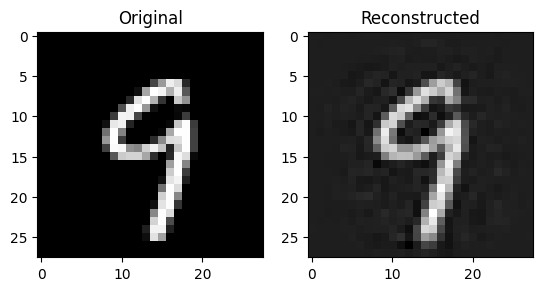

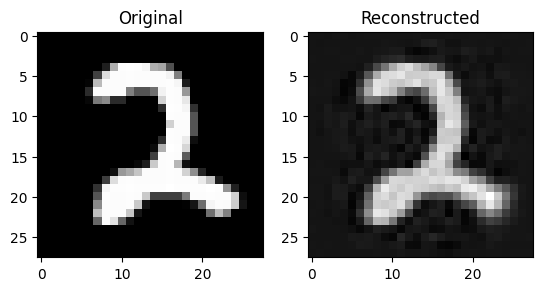

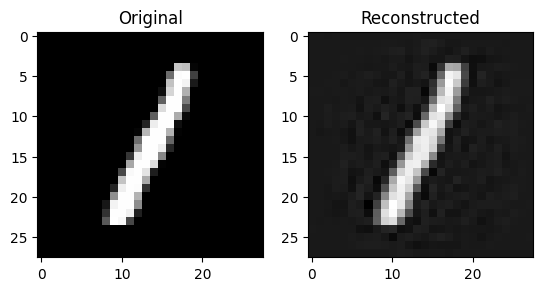

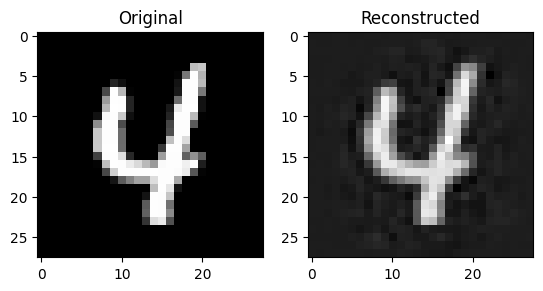

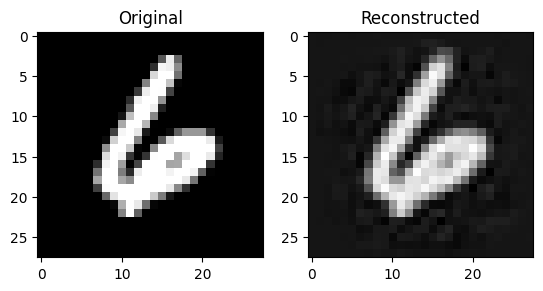

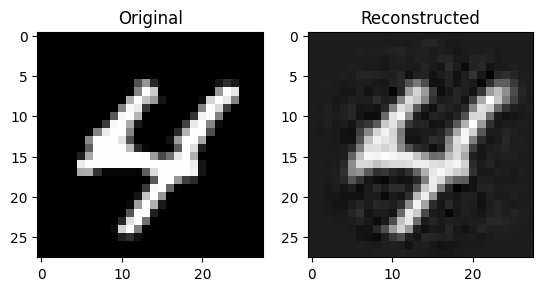

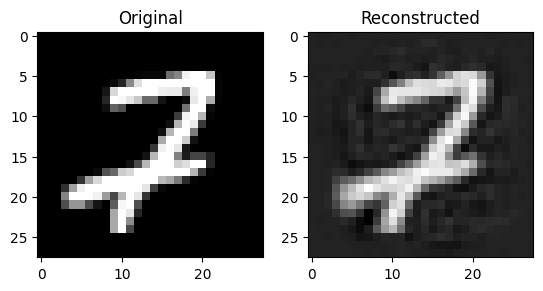

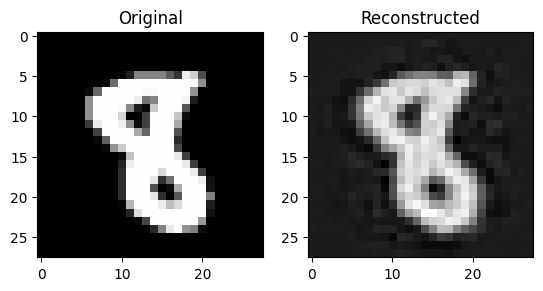

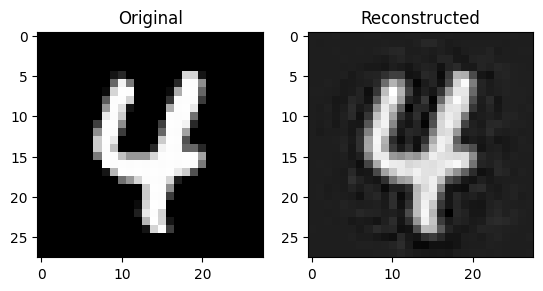

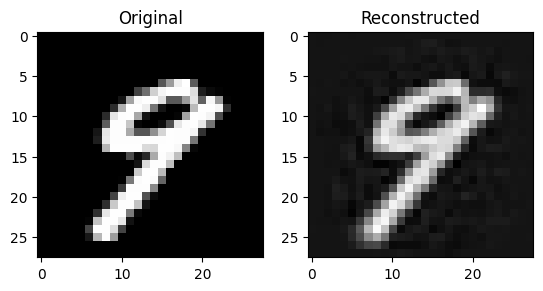

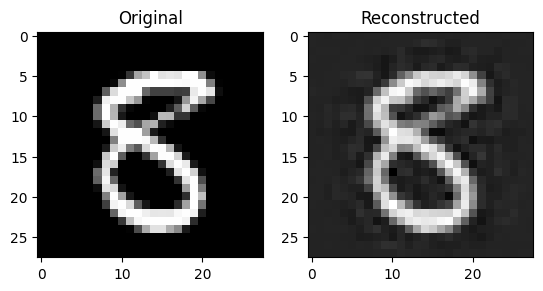

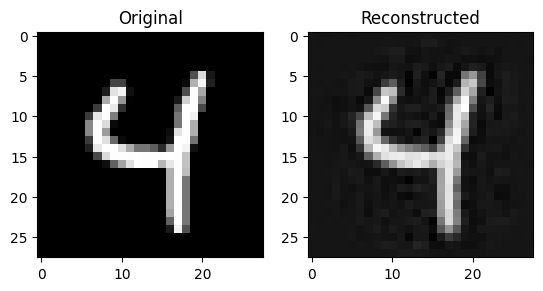

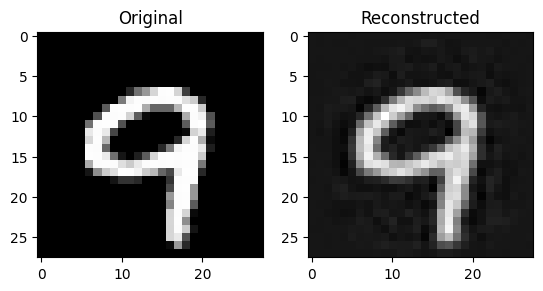

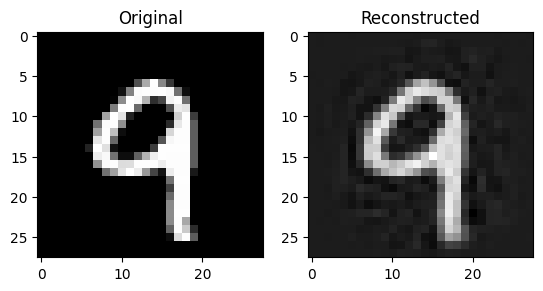

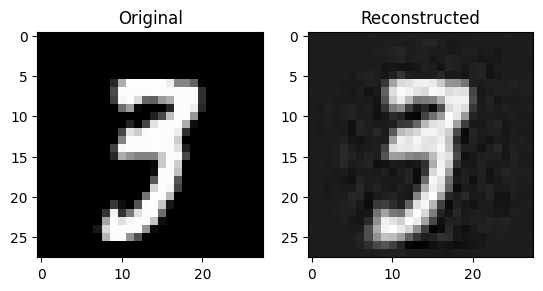

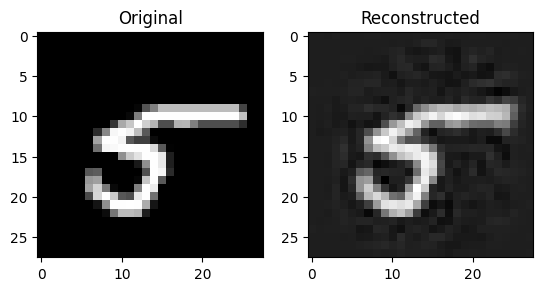

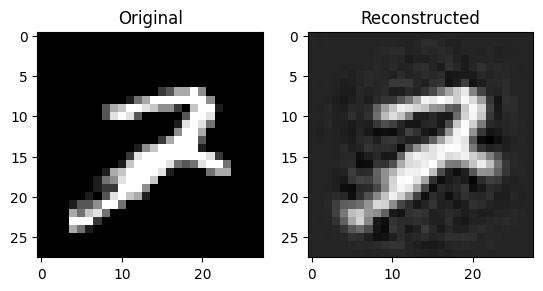

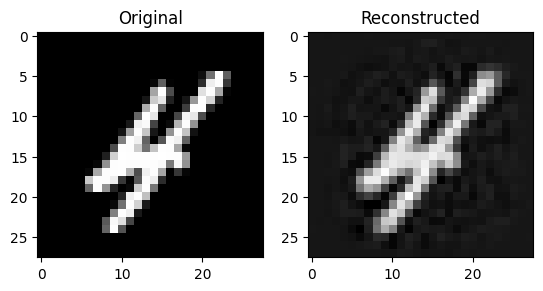

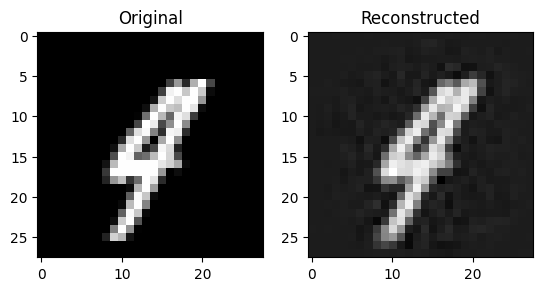

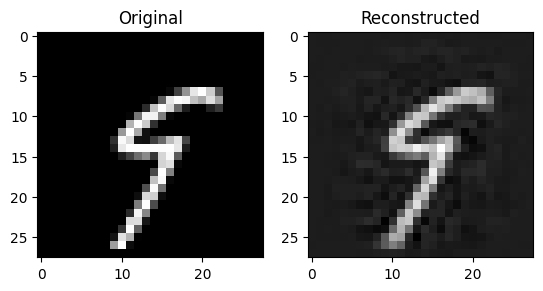

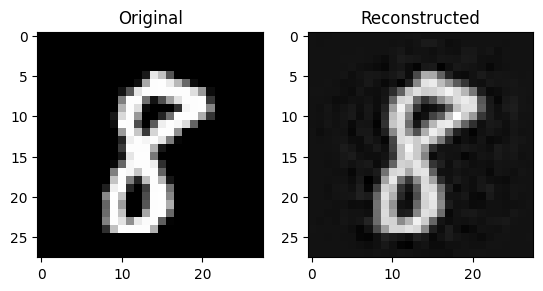

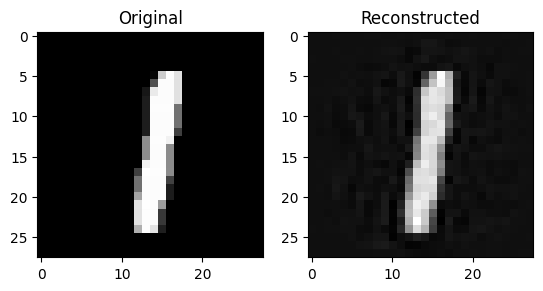

Conditional Model - Negative Log-Likelihood Loss: 2.0534
Conditional Model - Perceptual Loss: 0.0293


In [13]:
# Evaluate the conditional diffusion model using negative log-likelihood and perceptual metrics
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

nll_loss_total = 0
perceptual_loss_total = 0
with torch.no_grad():
    for images, labels in test_loader:
        # Flatten the images
        images = images.view(images.size(0), -1)

        # One-hot encode the labels
        labels_onehot = torch.zeros(images.size(0), 10)
        labels_onehot.scatter_(1, labels.view(-1, 1), 1)

        # Forward pass
        outputs = conditional_model(images, labels_onehot)

        # Compute the negative log-likelihood loss
        nll_loss_total += nll_loss(outputs, images).item()

        # Compute the perceptual loss
        perceptual_loss_total += perceptual_loss(outputs, images).item()

        # Plot the original and reconstructed images
        fig, axs = plt.subplots(1, 2)
        axs[0].imshow(images[0].view(28, 28), cmap='gray')
        axs[0].set_title('Original')
        axs[1].imshow(outputs[0].view(28, 28), cmap='gray')
        axs[1].set_title('Reconstructed')
        plt.show()

nll_loss_avg = nll_loss_total / len(test_loader)
perceptual_loss_avg = perceptual_loss_total / len(test_loader)

print('Conditional Model - Negative Log-Likelihood Loss: {:.4f}'.format(nll_loss_avg))
print('Conditional Model - Perceptual Loss: {:.4f}'.format(perceptual_loss_avg))